In [119]:
#Pandas is used for data manipulation
import pandas as pd

In [121]:
#Read in data and display first 5rows
features=pd.read_csv('SampleData_A.csv')
features.head(10)

,O,C,E,A,N,Age,Job,Marriage,Edu,Major,Religion,Salary,Vehicles,Comm T,Travel,SNS,SNS2,Culture,AAA
0,3.3,3.9,3.3,3.7,2.6,2,1,2,2,4,1,2,4,3,2,1,3,3,0.01705
1,2.7,3.2,3.2,2.7,2.8,2,1,2,2,4,3,2,4,3,2,2,0,3,0.00551
2,4.3,3.1,2.3,3.2,2.9,3,3,2,4,4,2,5,2,2,2,2,0,2,0.13559
3,4.2,4.3,3.5,3.6,2.6,2,1,2,4,4,4,2,4,3,3,1,2,2,0.25833
4,4.0,3.7,4.0,3.9,2.8,2,1,2,3,4,1,1,4,3,1,1,3,1,0.08292
5,3.8,4.0,3.1,3.8,2.3,4,3,1,5,4,1,5,4,1,2,1,2,1,0.05880
6,3.2,3.2,3.5,3.3,3.5,2,1,2,2,4,1,2,1,1,2,1,1,2,0.00000
7,2.8,3.8,3.8,3.3,2.3,3,1,2,4,4,3,2,4,3,1,1,2,3,0.00000


In [122]:
print('The shape of our features is: ', features.shape)

The shape of our features is:  (8, 19)


In [123]:
#Descriptive statistics for each column
#features.describe()

In [124]:
#Use numpy to convert to arrays
import numpy as np

In [125]:
#Labels are the values we want to predict
labels=np.array(features['AAA'])

In [126]:
#Remove the labels from the features
#axis 1 refers to the columns
features= features.drop('AAA', axis=1)
features.head(5)

,O,C,E,A,N,Age,Job,Marriage,Edu,Major,Religion,Salary,Vehicles,Comm T,Travel,SNS,SNS2,Culture
0,3.3,3.9,3.3,3.7,2.6,2,1,2,2,4,1,2,4,3,2,1,3,3
1,2.7,3.2,3.2,2.7,2.8,2,1,2,2,4,3,2,4,3,2,2,0,3
2,4.3,3.1,2.3,3.2,2.9,3,3,2,4,4,2,5,2,2,2,2,0,2
3,4.2,4.3,3.5,3.6,2.6,2,1,2,4,4,4,2,4,3,3,1,2,2
4,4.0,3.7,4.0,3.9,2.8,2,1,2,3,4,1,1,4,3,1,1,3,1


In [127]:
#Saving feature names for later use
feature_list=list(features.columns)

#Convert to numpy array
features=np.array(features)

In [128]:
#Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
train_features, test_features, train_labels, test_labels= train_test_split(features, labels, test_size=0.25, random_state=42)

In [129]:
print('Training Features Shape: ', train_features.shape)
print('Training Labels Shape: ', train_labels.shape)
print('Testing Features Shape: ', test_features.shape)
print('Testing Labels Shape: ', test_labels.shape)

Training Features Shape:  (6, 18)
Training Labels Shape:  (6,)
Testing Features Shape:  (2, 18)
Testing Labels Shape:  (2,)


In [130]:
#Import the model we are using
from sklearn.ensemble import RandomForestRegressor

#Instantiate model with 50 decision trees
rf=RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model on training data
rf.fit(train_features, train_labels);

In [131]:
#Use the forest's predict method on the test
predictions = rf.predict(test_features)

#Calculate the absoulte errors
errors=abs(predictions - test_labels)

#Print out the mean absolute error(mae)
print('Mean Absolute Errors: ', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Errors:  0.03 degrees.


In [132]:
#Calculate mean absolute percentage error (MAPE)
mape= 100*(errors/test_labels)

#Calculate and display accuracy
accuracy=100 - np.mean(mape)
print('Accuracy: ', round(accuracy,2), '%.')
#print(rf.feature_importances_)

Accuracy:  -192.98 %.


In [133]:
#Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
#Pull out one tree from the forest
tree=rf.estimators_[5]

In [134]:
#Export the image to a dot file 
export_graphviz(tree, out_file='tree_1.dot', feature_names=feature_list, rounded=True, precision=1)

In [135]:
#Use dot file to create a graph
(graph, )=pydot.graph_from_dot_file('tree_1.dot')

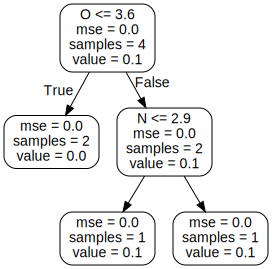

'tree_1.png.png'

In [136]:
#Write graph to a png file
#graph.write_png('tree_1.png')
import graphviz

with open('tree_1.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))    

dot=graphviz.Source(dot_graph);
dot.format='png'
dot.render(filename='tree_1.png')

In [137]:
#Variable Importances

#Get numerical feature importances
importances=list(rf.feature_importances_)

#List of tuples with variable and importance
feature_importances=[(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

#Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse = True)

#Print out the feature and importances
[print('Valiable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Valiable: O                    Importance: 0.32
Valiable: Religion             Importance: 0.15
Valiable: C                    Importance: 0.12
Valiable: Travel               Importance: 0.12
Valiable: Culture              Importance: 0.09
Valiable: A                    Importance: 0.06
Valiable: N                    Importance: 0.04
Valiable: Salary               Importance: 0.03
Valiable: E                    Importance: 0.02
Valiable: SNS2                 Importance: 0.02
Valiable: Edu                  Importance: 0.01
Valiable: Vehicles             Importance: 0.01
Valiable: Comm T               Importance: 0.01
Valiable: Age                  Importance: 0.0
Valiable: Job                  Importance: 0.0
Valiable: Marriage             Importance: 0.0
Valiable: Major                Importance: 0.0
Valiable: SNS                  Importance: 0.0


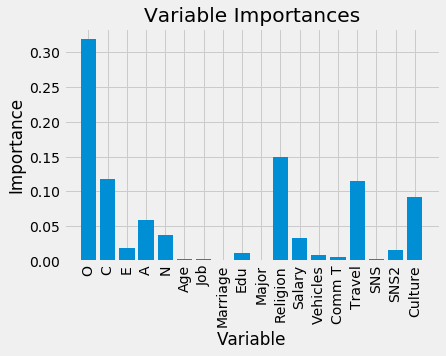

In [138]:
#Visualization

#Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

#Set the style
plt.style.use('fivethirtyeight')

#list of x locations for plotting
x_values=list(range(len(importances)))

#Make a bar chart
plt.bar(x_values, importances, orientation='vertical')

#Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

#Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable');
plt.title('Variable Importances');